In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from aeon.benchmarking import plot_critical_difference

In [2]:
EXP_PATH = "./experiment/"

In [3]:
mapping_algorithm ={
    "BasePersistentPattern" : "PP",
    "MatrixProfile" : "SM",
    "Valmod" : "VM", 
    "LatentMotif" : "LM",
    "Baseline" : "SF",
    "Grammarviz" : "GM"
}

mapping_dataset = {
    "REFIT" : "refit",
    "single_fixed_synthetic" : "single",
    "fixed_synthetic" : "fixed",
    "synthetic" : "variable", 
    "mitdb" : "mitdb-2", 
    "mitdb800" : "mitdb800",
    "arm-CODA" : "arm-coda",
    "mitdb1" : "mitdb-1",
    "ptt-ppg" : "ptt-ppg"
}

mapping_dataset_2 = {
    "REFIT" : "\\ref{dt: refit} refit",
    "single_fixed_synthetic" : "\\ref{dt: single} single",
    "fixed_synthetic" : "\\ref{dt: fixed} fixed",
    "synthetic" : "\\ref{dt: variable} variable", 
    "mitdb" : "\\ref{dt: mitdb-2} mitdb-2", 
    "mitdb800" : "\\ref{dt: mitdb800} mitdb800",
    "arm-CODA" : "\\ref{dt: arm-coda} arm-coda",
    "mitdb1" : "\\ref{dt: mitdb-1} mitdb-1",
    "ptt-ppg" : "\\ref{dt: ptt-ppg} ptt-ppg"
}

order_dataset = ["single","fixed","variable","mitdb-1","mitdb-2","mitdb800","ptt-ppg","refit","arm-coda"]
order_dataset_2 = [ 
    "\\ref{dt: single} single", 
    "\\ref{dt: fixed} fixed",
    "\\ref{dt: variable} variable", 
    "\\ref{dt: mitdb-1} mitdb-1", 
    "\\ref{dt: mitdb-2} mitdb-2", 
    "\\ref{dt: mitdb800} mitdb800",
    "\\ref{dt: ptt-ppg} ptt-ppg",
    "\\ref{dt: refit} refit",
    "\\ref{dt: arm-coda} arm-coda"
]
algorithms_order = ["SF","GM","LM","SM","VM","PP","A-PP"]

# Algortihms datasets occurrences detection performances

In [4]:
METRICS = ["ses-precision_0.5", "ses-recall_0.5", "ses-fscore_0.5"]

mapping_metric = {
    "ses-precision_0.5" : "precision", 
    "ses-recall_0.5" : "recall", 
    "ses-fscore_0.5" : "f1-score"
}

folders = [f for f in os.listdir(EXP_PATH) if "." not in f]
folders.remove("window-length")
folders.remove("neighborhood")
folders.remove("computational_time")
folders.remove("n_patterns")
folders.remove("lt-normalized")

lst =[]
for fol in folders: 
    path = EXP_PATH + fol +"/results"
    files = [f for f in os.listdir(path) if "_0.csv" in f]
    t_lst = []
    for f in files:
        t_lst.append(pd.read_csv(path+f"/{f}",index_col=0))
    df= pd.concat(t_lst)
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["algorithm"] = df.apply(lambda row : "A-" + row["algorithm"] if (row["config_idx"]==1)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    df = df[["metric","algorithm","score"]]
    #df = df[df["algorithm"]!= "PP-1"]
    df = df.groupby(["metric","algorithm"]).mean().reset_index()
    df["dataset"] = mapping_dataset_2[fol]
    lst.append(df)

    
df = pd.concat(lst)
df = pd.pivot_table(df,values="score",index=["dataset", "metric"],columns=["algorithm"],aggfunc="first")
df = df[algorithms_order]
df = df.loc[order_dataset_2]
# apply some formatting for all numbers (optional)
df_s = df.style.format("{:.2f}")

# loop through rows and find which column for each row has the highest value
for row in df.index:
    col = df.loc[row].idxmax()
    col2 = df.loc[row].nlargest(2).idxmin()
    # redo formatting for a specific cell
    df_s = df_s.format(lambda x: "\\textbf{" + f'{x:.2f}' + "}", subset=(row, col))
    df_s = df_s.format(lambda x: "\\underline{" + f'{x:.2f}' + "}", subset=(row, col2))
print(df_s.to_latex(hrules = True, clines = "skip-last;data",multirow_align = "t"))



\begin{tabular}{llrrrrrrr}
\toprule
 & algorithm & SF & GM & LM & SM & VM & PP & A-PP \\
dataset & metric &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{\ref{dt: single} single} & f1-score & 0.81 & 0.10 & 0.30 & 0.69 & 0.76 & \underline{0.96} & \textbf{0.97} \\
 & precision & 0.91 & 0.87 & 0.76 & \textbf{0.98} & 0.97 & 0.96 & \underline{0.98} \\
 & recall & 0.74 & 0.06 & 0.21 & 0.54 & 0.64 & \underline{0.95} & \textbf{0.96} \\
\cline{1-9}
\multirow[t]{3}{*}{\ref{dt: fixed} fixed} & f1-score & 0.47 & 0.20 & 0.53 & 0.83 & 0.86 & \textbf{0.90} & \underline{0.89} \\
 & precision & 0.49 & 0.57 & 0.70 & 0.84 & 0.85 & \underline{0.94} & \textbf{0.94} \\
 & recall & 0.50 & 0.13 & 0.44 & 0.83 & \textbf{0.88} & \underline{0.87} & 0.85 \\
\cline{1-9}
\multirow[t]{3}{*}{\ref{dt: variable} variable} & f1-score & 0.53 & 0.21 & 0.50 & 0.83 & 0.82 & \textbf{0.95} & \underline{0.95} \\
 & precision & 0.76 & 0.63 & 0.74 & 0.87 & 0.82 & \underline{0.97} & \textbf{0.97} \\
 & recall & 0.43 & 0.13 & 0

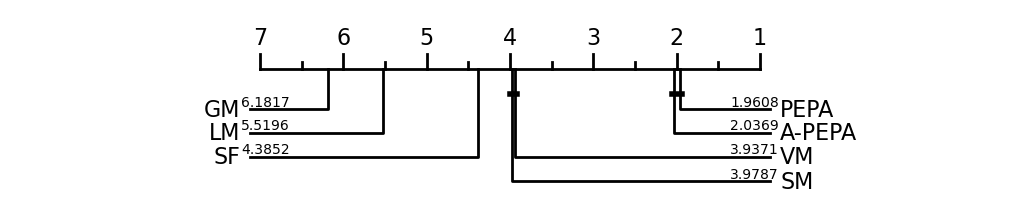

In [5]:
METRICS = ["ses-fscore_0.5"]

mapping_metric = {
    "ses-precision_0.5" : "precision", 
    "ses-recall_0.5" : "recall", 
    "ses-fscore_0.5" : "f1-score"
}

folders = [f for f in os.listdir(EXP_PATH) if "." not in f]
folders.remove("window-length")
folders.remove("neighborhood")
folders.remove("computational_time")
folders.remove("n_patterns")
folders.remove("lt-normalized")

algorithms_order = ["SF","GM","LM","SM", "VM","PP","A-PP"]
lst =[]
slst = []
for fol in folders: 
    path = EXP_PATH + fol +"/results"
    files = [f for f in os.listdir(path) if "_0.csv" in f]
    t_lst = []
    for f in files:
        t_lst.append(pd.read_csv(path+f"/{f}",index_col=0))
    df= pd.concat(t_lst)
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["algorithm"] = df.apply(lambda row : "A-" + row["algorithm"] if (row["config_idx"]==1)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    df["dataset"] = mapping_dataset_2[fol]
    slst.append(df)



sdf = pd.concat(slst)
lst = []
for d in sdf.dataset.unique():
    tdf = sdf[sdf["dataset"] == d]
    n_sig = tdf.signal_idx.max()+1
    tlst = []
    for alg in sdf.algorithm.unique(): 
        arr = np.zeros(n_sig)
        ttdf = tdf[tdf["algorithm"]==alg]
        arr[ttdf.signal_idx.values] = ttdf.score.values
        tlst.append(arr.reshape(-1,1))
    lst.append(np.hstack(tlst))
scores = np.vstack(lst)
algorithms = sdf.algorithm.unique()
for i,alg in enumerate(algorithms): 
    if alg == "PP": 
        algorithms[i] = "PEPA"
    elif alg == "A-PP": 
        algorithms[i] = "A-PEPA"
plot_critical_difference(scores,algorithms)

# Algorithms datasets Motif set discovery performances

In [6]:
METRICS = ["es-precision_0.5", "es-recall_0.5", "es-fscore_0.5"]

mapping_metric = {
    "es-precision_0.5" : "precision", 
    "es-recall_0.5" : "recall", 
    "es-fscore_0.5" : "f1-score"
}

folders = [f for f in os.listdir(EXP_PATH) if "." not in f]
folders.remove("window-length")
folders.remove("neighborhood")
folders.remove("computational_time")
folders.remove("n_patterns")
folders.remove("lt-normalized")

algorithms_order = ["SF","GM","LM","SM", "VM","PP","A-PP"]
lst =[]
for fol in folders: 
    path = EXP_PATH + fol +"/results"
    files = [f for f in os.listdir(path) if "_0.csv" in f]
    t_lst = []
    for f in files:
        t_lst.append(pd.read_csv(path+f"/{f}",index_col=0))
    df= pd.concat(t_lst)
    
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["algorithm"] = df.apply(lambda row : "A-" + row["algorithm"] if (row["config_idx"]==1)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    df = df[["metric","algorithm","score"]]
    #df = df[df["algorithm"]!= "PP-1"]
    df = df.groupby(["metric","algorithm"]).mean().reset_index()
    df["dataset"] = mapping_dataset_2[fol]
    lst.append(df)

    
df = pd.concat(lst)
xdf = df[(df["algorithm"]=="PP")*(df["metric"] == "f1-score")]
xdf =xdf.set_index("dataset") # will be used to compare A-PEPA.
df = pd.pivot_table(df,values="score",index=["dataset", "metric"],columns=["algorithm"],aggfunc="first")
df = df[algorithms_order]
df = df.loc[order_dataset_2]
# apply some formatting for all numbers (optional)
df_s = df.style.format("{:.2f}")

# loop through rows and find which column for each row has the highest value
for row in df.index:
    col = df.loc[row].idxmax()
    col2 = df.loc[row].nlargest(2).idxmin()
    # redo formatting for a specific cell
    df_s = df_s.format(lambda x: "\\textbf{" + f'{x:.2f}' + "}", subset=(row, col))
    df_s = df_s.format(lambda x: "\\underline{" + f'{x:.2f}' + "}", subset=(row, col2))

print(df_s.to_latex(hrules = True, clines = "skip-last;data",multirow_align = "t"))

\begin{tabular}{llrrrrrrr}
\toprule
 & algorithm & SF & GM & LM & SM & VM & PP & A-PP \\
dataset & metric &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{\ref{dt: single} single} & f1-score & 0.81 & 0.10 & 0.30 & 0.69 & 0.76 & \textbf{0.96} & \underline{0.85} \\
 & precision & 0.91 & 0.87 & 0.76 & \textbf{0.98} & 0.97 & 0.96 & \underline{0.98} \\
 & recall & 0.74 & 0.06 & 0.21 & 0.54 & 0.64 & \textbf{0.95} & \underline{0.78} \\
\cline{1-9}
\multirow[t]{3}{*}{\ref{dt: fixed} fixed} & f1-score & 0.34 & 0.14 & 0.43 & 0.64 & 0.63 & \textbf{0.84} & \underline{0.81} \\
 & precision & 0.27 & 0.20 & 0.46 & 0.69 & 0.61 & \textbf{0.86} & \underline{0.85} \\
 & recall & 0.52 & 0.11 & 0.42 & 0.65 & 0.70 & \textbf{0.85} & \underline{0.81} \\
\cline{1-9}
\multirow[t]{3}{*}{\ref{dt: variable} variable} & f1-score & 0.33 & 0.13 & 0.41 & 0.65 & 0.63 & \textbf{0.80} & \underline{0.80} \\
 & precision & 0.29 & 0.20 & 0.52 & 0.70 & 0.64 & \underline{0.81} & \textbf{0.82} \\
 & recall & 0.42 & 0.10 & 0

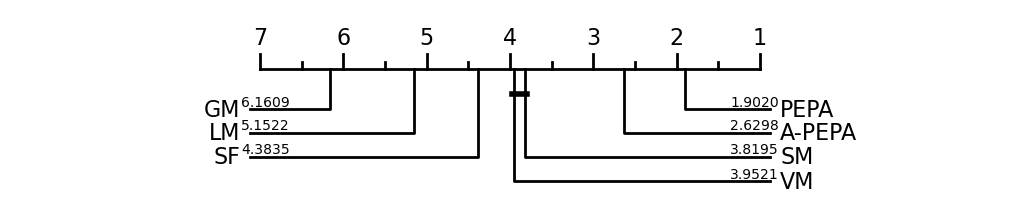

In [7]:
METRICS = ["es-fscore_0.5"]

mapping_metric = {
    "es-precision_0.5" : "precision", 
    "es-recall_0.5" : "recall", 
    "es-fscore_0.5" : "f1-score"
}

folders = [f for f in os.listdir(EXP_PATH) if "." not in f]
folders.remove("window-length")
folders.remove("neighborhood")
folders.remove("computational_time")
folders.remove("n_patterns")
folders.remove("lt-normalized")

algorithms_order = ["SF","GM","LM","SM", "VM","PP","A-PP"]
slst = []
lst =[]
for fol in folders: 
    path = EXP_PATH + fol +"/results"
    files = [f for f in os.listdir(path) if "_0.csv" in f]
    t_lst = []
    for f in files:
        t_lst.append(pd.read_csv(path+f"/{f}",index_col=0))
    df= pd.concat(t_lst)
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["algorithm"] = df.apply(lambda row : "A-" + row["algorithm"] if (row["config_idx"]==1)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    df["dataset"] = mapping_dataset_2[fol]
    slst.append(df.copy())
    
sdf = pd.concat(slst)
lst = []
for d in sdf.dataset.unique():
    tdf = sdf[sdf["dataset"] == d]
    n_sig = tdf.signal_idx.max()+1
    tlst = []
    for alg in sdf.algorithm.unique(): 
        arr = np.zeros(n_sig)
        ttdf = tdf[tdf["algorithm"]==alg]
        arr[ttdf.signal_idx.values] = ttdf.score.values
        tlst.append(arr.reshape(-1,1))
    lst.append(np.hstack(tlst))
scores = np.vstack(lst)
algorithms = sdf.algorithm.unique()
for i,alg in enumerate(algorithms): 
    if alg == "PP": 
        algorithms[i] = "PEPA"
    elif alg == "A-PP": 
        algorithms[i] = "A-PEPA"
plot_critical_difference(scores,algorithms)

# Window length influence

/tmp/ipykernel_1972074/785936298.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticks(), rotation=45)
/tmp/ipykernel_1972074/785936298.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticks(), rotation=45)
/tmp/ipykernel_1972074/785936298.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticks(), rotation=45)
/tmp/ipykernel_1972074/785936298.py:60: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
/tmp/ipykernel_1972074/785936298.py:63: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


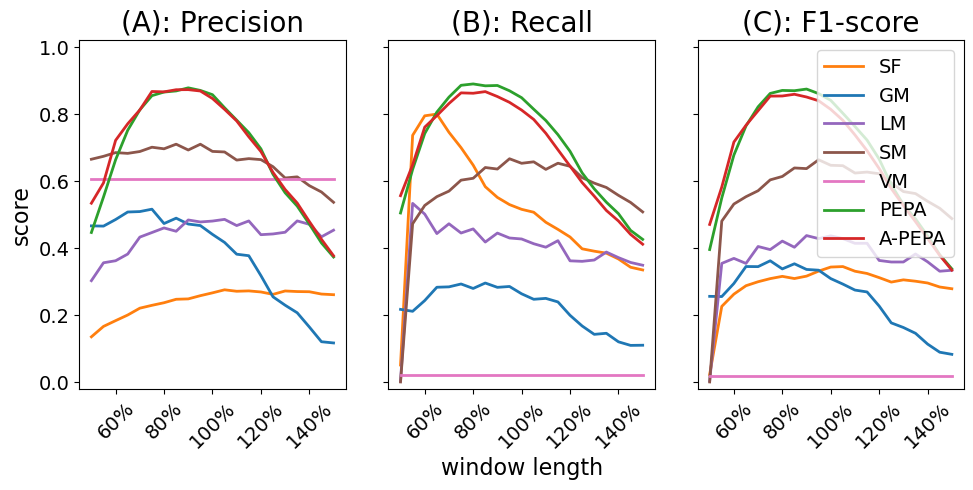

In [8]:
def set_algo_name(row,max_config): 
    name = mapping_algorithm[row["algorithm"]]
    nloop = row["config_idx"] // max_config
    if nloop >0: 
        name = f"A-" + name 
    return name
METRICS = ["es-precision_0.5", "es-recall_0.5", "es-fscore_0.5"]

mapping_metric = {
    "es-precision_0.5" : "precision", 
    "es-recall_0.5" : "recall", 
    "es-fscore_0.5" : "fscore"
}

algs = ["GM","SF","PP","A-PP","LM","SM","VM"]
cmap = plt.cm.tab10
color_map = {}
for i,alg in enumerate(algs): 
    color_map[alg] = cmap(i)
window_length = np.arange(50,151,5)
wlen_plot = [f"{x}%" for x in window_length]
folder = "window-length"
path = EXP_PATH + folder +"/results/"
lst = []
for f in [f for f in os.listdir(path) if "_0.csv" in f]: 
    lst.append(pd.read_csv(path + f,index_col=0))
df = pd.concat(lst)
df = df[df["metric"].isin(METRICS)]
df["algorithm"] = df.apply(lambda row : set_algo_name(row,window_length.shape[0]),axis=1)
df["config_idx"] = df["config_idx"].apply(lambda x : x % window_length.shape[0])
fig,axs= plt.subplots(1,3,figsize = (10,5),sharex=True, sharey=True)
for i,metric in enumerate(METRICS): 
    tdf = df[df["metric"] == metric]
    tdf = pd.pivot_table(tdf,values = "score", index="algorithm", columns="config_idx", aggfunc = "mean")
    tdf = tdf.loc[algorithms_order]
    for line,algo in zip(tdf.values,tdf.index):
        if algo == "VM":
            axs[i].plot([50,150],[line[0],line[0]],label=algo,color = color_map[algo],linewidth=2)
        else:
            if algo == "PP": 
                algo_name = "PEPA"
            elif algo == "A-PP": 
                algo_name= "A-PEPA"
            else: 
                algo_name = algo
            axs[i].plot(window_length,line,label=algo_name,color = color_map[algo],linewidth=2)
    #axs[i].set_title(mapping_metric[metric],fontsize=20)
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation=45)
    axs[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))

axs[-1].legend(fontsize=14,loc=1)
axs[0].set_title("(A): Precision",fontsize=20)
axs[1].set_title("(B): Recall",fontsize=20)
axs[2].set_title("(C): F1-score",fontsize=20)
axs[0].set_ylabel("score",fontsize=16)
axs[1].set_xlabel("window length",fontsize=16)
axs[0].set_ylim(-0.02,1.02)
for ax in axs.flat:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
for ax in axs.flat:
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

fig.tight_layout()

plt.savefig("pictures/window.pdf", format="pdf")

# Neighborhood influence

/tmp/ipykernel_1972074/2259105365.py:63: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
/tmp/ipykernel_1972074/2259105365.py:66: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


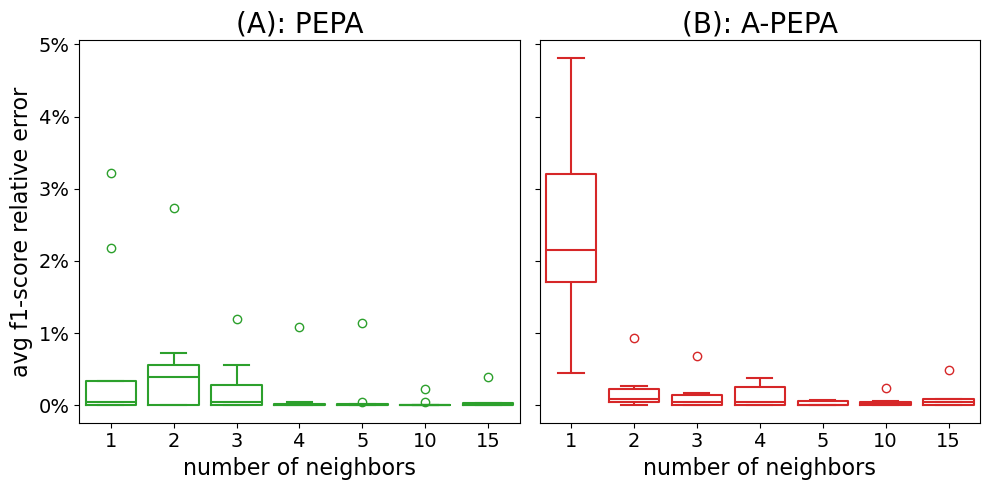

In [9]:
METRICS = ["es-fscore_0.5"]

mapping_metric = {
    "es-precision_0.5" : "precision", 
    "es-recall_0.5" : "recall", 
    "es-fscore_0.5" : "fscore"
}

neigh_colors = ["tab:green", "tab:red"]

mapping_neighbor = [1,2,3,4,5,10,15,20,30,40,50]
N_neighbor = len(mapping_neighbor)
folder = "neighborhood"
path = EXP_PATH + folder +"/results/"
lst = []
for f in [f for f in os.listdir(path) if "_0.csv" in f]: 
    df = pd.read_csv(path + f,index_col=0)
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["algorithm"] = df.apply(lambda row : "A-" + row["algorithm"] if (row["config_idx"]>=N_neighbor)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    df["n_neighbor"] = df["config_idx"].apply(lambda x : mapping_neighbor[x % N_neighbor])
    #df["algorithm"] = df.apply(lambda row : row["algorithm"] + "-A" if (row["config_idx"]==1)*(row["algorithm"]=="PP") else row["algorithm"],axis=1)
    name = f.removesuffix("_BasePersistentPattern_0.csv")
    df["dataset"] = mapping_dataset[name]
    df = df.groupby(["metric","algorithm","n_neighbor","dataset"]).mean().reset_index()
    df = df[["metric","algorithm","n_neighbor","score","dataset","signal_idx"]]
    lst.append(df)
df = pd.concat(lst)
#df = pd.pivot_table(df,values="score",index=["algorithm","dataset", "metric"],columns=["n_neighbor"],aggfunc="first")
#df = df.reset_index()
df
fig,axs = plt.subplots(1,2,figsize = (10,5),sharex=True,sharey=True)
for i,alg in enumerate(["PP", "A-PP"]):
    arr = []
    for dataset in df["dataset"].unique(): 
        for idx in df[df["dataset"] == dataset]["signal_idx"].unique():
            tdf = df[(df["dataset"]== dataset)*(df["signal_idx"] == idx)*(df["algorithm"]==alg)]
            tdf.sort_values(by="n_neighbor")
            try:
                l = tdf["score"].values
                if l[-1]!= 0:
                    l = np.abs(l[:-4] - l[-1])/l[-1]
                    l = np.vstack((np.array([1,2,3,4,5,10,15]),l))
                    arr.append(l.T)
            except: 
                pass 
    tdf = pd.DataFrame(np.concatenate(arr),columns=["n_neighbor","score"])      
    sns.boxplot(data=tdf,x="n_neighbor", y="score", fill=False,ax=axs[i],color= neigh_colors[i])    

axs[0].set_title("(A): PEPA",fontsize=20)
axs[0].set_xlabel("number of neighbors",fontsize=16)
axs[1].set_title("(B): A-PEPA",fontsize=20)
axs[1].set_xlabel("number of neighbors",fontsize=16)
axs[0].set_ylabel("avg f1-score relative error",fontsize=16)

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(np.around(x*100,0))}%'))
axs[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{mapping_neighbor[x]}'))
#axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x*100)}%'))
axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{mapping_neighbor[x]}'))
for ax in axs.flat:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
for ax in axs.flat:
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

fig.tight_layout()  
plt.savefig("pictures/neighborhood.pdf", format="pdf")


# Heuristic influence

/tmp/ipykernel_1972074/3175655514.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16,rotation = -45)
/tmp/ipykernel_1972074/3175655514.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


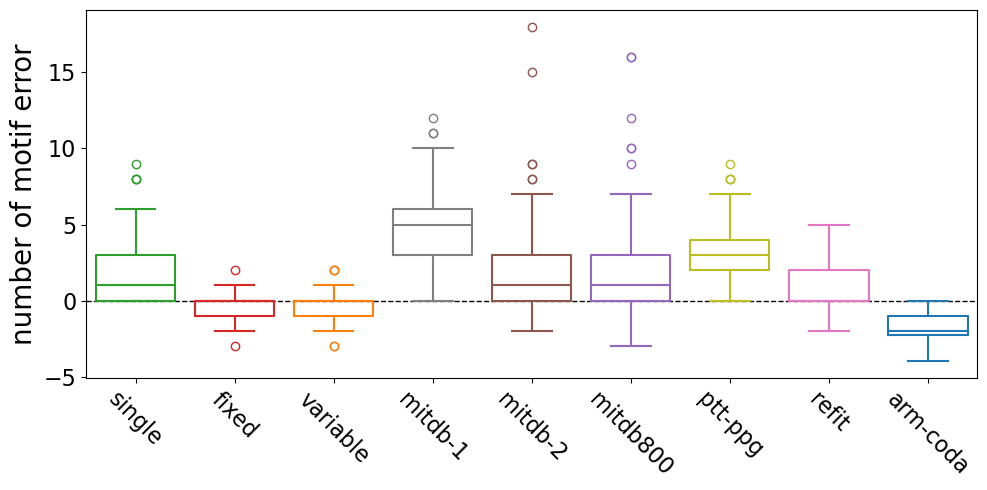

In [10]:
METRICS = ["es-fscore_0.5"]

mapping_metric = {
    "es-precision_0.5" : "precision", 
    "es-recall_0.5" : "recall", 
    "es-fscore_0.5" : "fscore"
}

folder = "n_patterns"
path = EXP_PATH + folder +"/results/"

lst=[]
for f in [f for f in os.listdir(path) if "_0.csv" in f]: 
    df = pd.read_csv(path + f,index_col=0)
    df = df[df.metric.isin(METRICS)]
    df["metric"] = df["metric"].apply(lambda x : mapping_metric[x])
    df["algorithm"] = df["algorithm"].apply(lambda x :mapping_algorithm[x])
    df["jump"] = df["config_idx"]+1
    name = f.removesuffix("_BasePersistentPattern_0.csv")
    df["dataset"] = mapping_dataset[name]
    lst.append(df)

df = pd.concat(lst)
df["count error"] =  df["predicted_n_patterns"].values - df["n_patterns"].values 
df = df[["dataset","count error","jump"]]
df = df[df["jump"]==2]

fig,ax = plt.subplots(figsize=(10,5))
ax.axhline(0,linestyle="--",color="black",linewidth=1)
sns.boxplot(data=df,x="dataset", y="count error", hue = "dataset", fill=False, order = order_dataset,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16,rotation = -45)
ax.set_xlabel("")
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
ax.set_ylabel("number of motif error",fontsize=20)
fig.tight_layout()

plt.savefig("pictures/count.pdf", format="pdf")

## Computational time

In [11]:
def set_algo_name(row): 
    nghs = ["_X", "", "_X"]
    name = mapping_algorithm[row["algorithm"]]
    if name == "PP": 
        config_idx = row["config_idx"]
        name = name + f"{nghs[config_idx]}"
    return name

/tmp/ipykernel_1972074/3116322595.py:39: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/tmp/ipykernel_1972074/3116322595.py:42: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


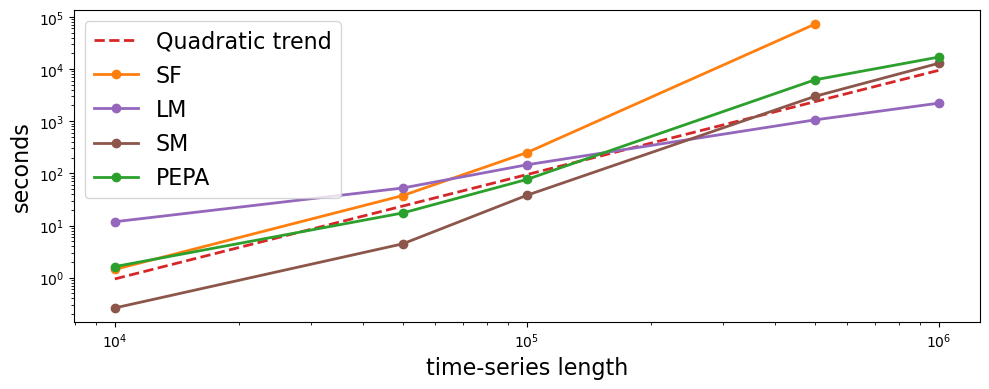

In [12]:
folder = "computational_time"
path = EXP_PATH + folder +"/results/"

N_SIGNALS = 10
ARRAY_SIZE = np.array([10000,50000,100000,500000,1000000])
signal_size = [[s]*N_SIGNALS for s in ARRAY_SIZE]
signal_size = np.concatenate(signal_size)

lst = []
for f in [f for f in os.listdir(path) if "_0.csv" in f]: 
    lst.append(pd.read_csv(path + f,index_col=0))
df = pd.concat(lst)

df["signal_size"] = df["signal_idx"].apply(lambda x : signal_size[x])
df["algorithm"] = df.apply(lambda row : set_algo_name(row),axis=1)
df = df[["algorithm","execution_time","signal_size"]]
df = pd.pivot_table(df,values = "execution_time", index = "algorithm", columns = "signal_size")
df =df.loc[["SF","LM","SM","PP"]]
fig,ax = plt.subplots(1,1,figsize=(10,4))
x = df.columns
start = df.loc[["PP","SM"]].values[:,0].mean()
ax.plot(x,start*(x/x[0])**2,"--",color = 'tab:red',linewidth=2,label = "Quadratic trend")
names = df.index
for y,name in zip(df.values,names): 
    if (name != "PP_X"):
        if name == "PP":
            tname = "PEPA"
        else: 
            tname = name 
        ax.plot(x,y,"-o",label = tname,linewidth=2,color=color_map[name])
ax.set_yscale("log")
ax.set_xlabel("time-series length",fontsize=16)
ax.set_ylabel("seconds",fontsize=16)
ax.set_xticks(ARRAY_SIZE)
ax.set_xscale("log")
ax.legend(fontsize=16)
for ax in axs.flat:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
for ax in axs.flat:
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
fig.tight_layout()


plt.savefig("pictures/time.pdf", format="pdf")
